In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random

In [6]:
df = pd.read_csv('homeprices_banglore.csv')
df.tail()

,area,bedrooms,price
15,1175,2,42.0
16,1180,3,48.0
17,1540,3,60.0
18,2770,3,102.0
19,800,1,32.0


In [62]:
sx = MinMaxScaler()
sy = MinMaxScaler()
X = sx.fit_transform(df.drop('price', axis = 1))
y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
y = y.reshape(y.shape[0])

In [63]:
def batch_gradient_descent(X, y, epochs, alpha):
    costs = []
    w = np.ones(X.shape[1])
    b = 0
    for epoch in range(epochs):
        y_pred = np.dot(X, w) + b
        cost = np.mean(np.square(y_pred - y))
        grad_w = np.dot(X.T, (y_pred - y)) / y.shape[0]
        grad_b = np.sum(y_pred - y) / y.shape[0]
        w = w - (alpha * grad_w)
        b = b - (alpha * grad_b)
        if (epoch % 10 == 0):
            costs.append(cost)
            print("cost: ", cost)
    return w, b, costs

In [72]:
w, b, costs = batch_gradient_descent(X, y, 1000, 0.01)

cost:  0.2768777174681
cost:  0.21397546999727107
cost:  0.1663150357632814
cost:  0.13018903172030066
cost:  0.10279212306298735
cost:  0.08200153937306316
cost:  0.06621099506620855
cost:  0.05420501992722476
cost:  0.045063867243363934
cost:  0.03809155946473401
cost:  0.032761441621765364
cost:  0.028674982552488616
cost:  0.025530600512994172
cost:  0.023100074061235813
cost:  0.021210692582967195
cost:  0.01973174990336136
cost:  0.018564324234783748
cost:  0.017633544837064093
cost:  0.016882740329209563
cost:  0.016269010813571537
cost:  0.015759877373811012
cost:  0.015330746802666533
cost:  0.014962993199803754
cost:  0.014642506344456085
cost:  0.014358593268407691
cost:  0.014103147089541227
cost:  0.013870018076841694
cost:  0.013654537740478808
cost:  0.013453158713371457
cost:  0.013263182250229141
cost:  0.013082552025297406
cost:  0.012909698097267497
cost:  0.0127434188348973
cost:  0.012582791566935281
cost:  0.012427104967318298
cost:  0.012275807887167183
cost:  0.

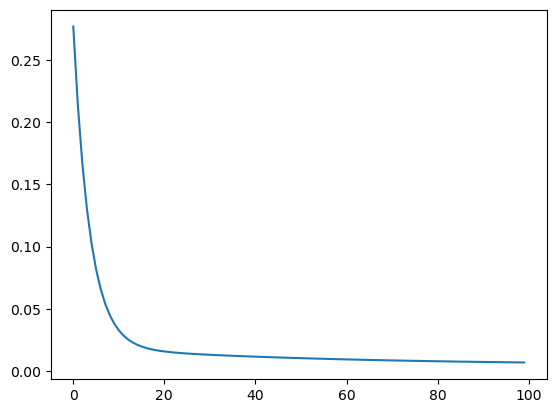

In [73]:
plt.plot(np.arange(len(costs)), costs)


In [90]:
def predict(x, w, b):
    scaled_x = sx.transform([x])
    y_pred = w[0] * scaled_x[0][0] + w[1] * scaled_x[0][1] + b
    return sy.inverse_transform([[y_pred]])

In [92]:
predict([1440, 3], w, b)

/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[67.50230303]])

In [105]:
def stochastic_gradient_descent(X, y, epochs, alpha):
    costs = []
    w = np.ones(X.shape[1])
    b = 0
    for epoch in range(epochs):
        random_index = random.randint(0, y.shape[0] - 1)
        y_pred = np.dot(X[random_index], w) + b
        cost = np.square(y_pred - y[random_index])
        grad_w = (y_pred - y[random_index]) * X[random_index]
        grad_b = y_pred - y[random_index]
        w = w - (alpha * grad_w)
        b = b - (alpha * grad_b)
        if (epoch % 10 == 0):
            costs.append(cost)
            print("cost: ", cost)
    return w, b, costs

In [106]:
w, b, costs = stochastic_gradient_descent(X, y, 1000, 0.01)

cost:  1.0
cost:  0.047455442863261824
cost:  0.13357102626583459
cost:  0.021357269341369004
cost:  0.007051406578729683
cost:  0.10742966968902898
cost:  0.07152764812370677
cost:  0.03862342007725053
cost:  0.07969119702468087
cost:  0.013940684052606163
cost:  0.0004058768349148195
cost:  0.004226856818468761
cost:  0.002768274531597011
cost:  0.01867259985663709
cost:  0.0001977761785158823
cost:  0.007123930643807595
cost:  0.016637385610386843
cost:  0.03294365870439453
cost:  5.473350420430426e-05
cost:  0.006441968496126345
cost:  0.019339596286608796
cost:  0.0016553662756263845
cost:  0.00032398863904232545
cost:  0.01621924214363162
cost:  0.08809446340745998
cost:  0.00469829295045914
cost:  0.0006254208340532344
cost:  0.07294963249443873
cost:  0.007758149948200781
cost:  0.06340724664436469
cost:  0.0005224999513935892
cost:  0.006167651771782459
cost:  0.010708853544168622
cost:  0.0066767160789436555
cost:  0.008328048754964703
cost:  0.0017711192629276367
cost:  0.01

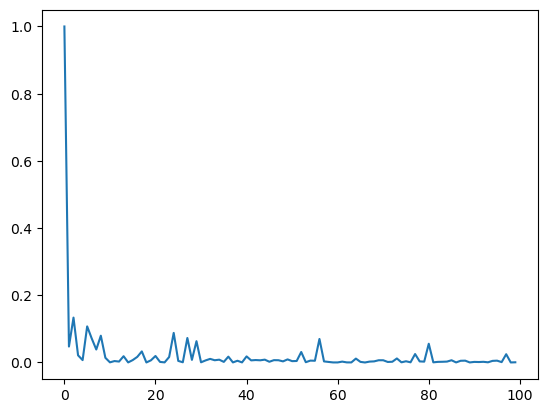

In [109]:
plt.plot(np.arange(len(costs)), costs)

In [125]:
def minibatch_gradient_descent(X, y, epochs, alpha):
    costs = []
    w = np.ones(X.shape[1])
    b = 0
    for epoch in range(epochs):
        permutation = np.random.permutation(y.shape[0])
        X_perm = X[permutation]
        y_perm = y[permutation]
        for i in range(0, y_perm.shape[0], y_perm.shape[0] // 5):
            end = min(i + (y_perm.shape[0] // 5), y_perm.shape[0])
            start = i
            X_batch = X_perm[start:end]
            y_batch = y_perm[start:end]
            y_pred = np.dot(X_batch, w) + b
            cost = np.mean(np.square(y_pred - y_batch))
            grad_w = np.dot(X_batch.T, (y_pred - y_batch)) / y_batch.shape[0]
            grad_b = np.sum(y_pred - y_batch) / y_batch.shape[0]
            w = w - (alpha * grad_w)
            b = b - (alpha * grad_b)
            if (epoch % 10 == 0):
                costs.append(cost)
                print("cost: ", cost)
    return w, b, costs

In [126]:
w, b, costs = minibatch_gradient_descent(X, y, 1000, 0.01)

cost:  0.20501283475971677
cost:  0.20866943507914038
cost:  0.23833428221602448
cost:  0.45921436097500046
cost:  0.20562791276236386
cost:  0.04904583537183587
cost:  0.13316492096801294
cost:  0.09531019828674245
cost:  0.0739555564103361
cost:  0.0415524551389266
cost:  0.06480606520907733
cost:  0.021898413850619053
cost:  0.024248843302664545
cost:  0.03195588557603225
cost:  0.016734123376481495
cost:  0.023082661942987703
cost:  0.00807968110482879
cost:  0.0039994415089376414
cost:  0.004076198425982272
cost:  0.058255469525808456
cost:  0.009169733779514775
cost:  0.027329861266135926
cost:  0.010450367696301383
cost:  0.027767115850009398
cost:  0.0039058725730926804
cost:  0.021768925332911696
cost:  0.01373942510434125
cost:  0.004376021869004185
cost:  0.02690861419618329
cost:  0.003727726267117464
cost:  0.005360022915206458
cost:  0.028361250731460036
cost:  0.010684732045369044
cost:  0.0033885710199730618
cost:  0.017559636034265302
cost:  0.0075489025544987435
cost:

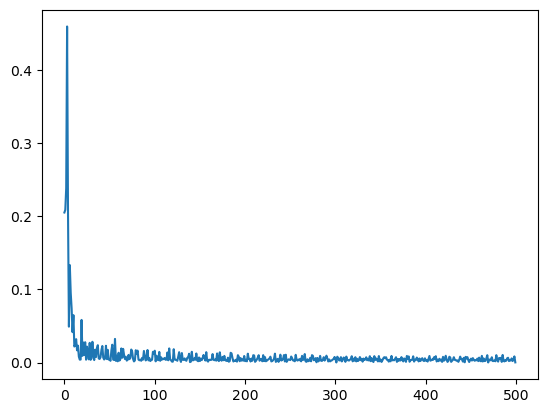

In [127]:
plt.plot(np.arange(len(costs)), costs)